## Introduction

We'll learn how to visualize the distributions of user ratings using __histograms__ and __box plots__.

Data: `fandango_scores.csv` from <a href="https://github.com/fivethirtyeight/data/tree/master/fandango"> here</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv("data/fandango_scores.csv")
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


### Frequency Distribution

Let's first compare the __frequency distributions__ of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). We can use `Series.value_counts()` to return the frequency distribution as Series object:
```
freq_counts = df['Fandango_Ratingvalue'].value_counts()
```
The resulting Series object will be sorted by frequency in descending order. While this ordering is helpful when we're looking to quickly find the most common values in a given column, it's not helpful when trying to understand the range that the values in the column span. We can use `Series.sort_index()` to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object)

In [2]:
fandango_distribution = norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index()
imdb_distribution = norm_reviews["IMDB_norm"].value_counts().sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


### Binning

Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the Fandango_Ratingvalue column ranges from 2.7 to 4.8 while the IMDB_norm column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:
- What percent of the ratings are contained in the 2.0 to 4.0 range?
    - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites?

Comparing frequency distributions is also challenging because the `Fandango_Ratingvalue` column contains 21 unique values while `IMDB_norm` contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called __bins__. We can then sum the frequencies for the values that fall into each bin.

The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a __histogram__.

### Histogram In Matplotlib

We can generate a histogram using Axes.hist(). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:
- calculate the minimum and maximum value from the sequence of values we passed in
- create 10 bins of equal length that span the range from the minimum to the maximum value
- group unique values into the bins
- sum up the associated unique values
- generate a bar for the frequency sum for each bin

The default behavior of `Axes.hist()` is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the `range` parameter to specify the range we want matplotlib to use as a tuple:
```
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
```

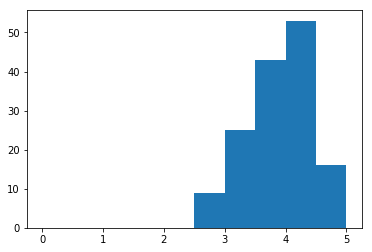

In [3]:
fig, ax = plt.subplots()
ax.hist(norm_reviews["Fandango_Ratingvalue"], range=(0, 5))
plt.show()

### Comparing histograms

If you recall, one of the questions we were looking to answer was:
- What percent of the ratings are contained in the 2.0 to 4.0 range?